<a href="https://colab.research.google.com/github/shushlyakovProjects/Blender_Threejs_tutorial/blob/main/LabWork_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Методы машинного обучения**
##Лабораторная работа №1
##ИНС-б-о-21-1 Шушляков Никита.

**Вариант: 21**


# Утилиты загрузки данных

Подключение библиотеки для доступа к наборам данных

In [1]:
from sklearn import datasets
import numpy as np

## Готовый набор данных

Получение готового набора данных

In [13]:
myDataset = datasets.load_breast_cancer()

Получение описания набора данных

In [14]:
print(myDataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Построение матрицы признаков для данных digits

In [15]:
features = myDataset.data
target = myDataset.target
print('Признаки: ', features.shape)
print('Классы (целевая переменная): ', target.shape)
print('Признаки экземпляра 0\n', features[0])
print('Целевая переменная экземпляра 0\n', target[0])

Признаки:  (569, 30)
Классы (целевая переменная):  (569,)
Признаки экземпляра 0
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
Целевая переменная экземпляра 0
 0


Выполним визуализацию экземпляров готового набора данных (в виде изображений)

<Figure size 640x480 with 0 Axes>

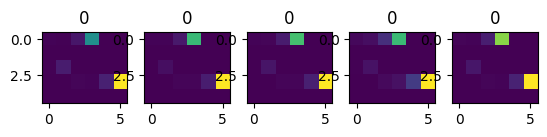

In [25]:
from matplotlib import pyplot as plt
plt.figure()
N = 5
f, ax = plt.subplots(1,N)
for i in range(N):
  ax[i].imshow(features[i].reshape((5,6)))
  ax[i].set_title(f'{target[i]}')

## Искусственный набор данных


---


### В соответствии с вариантом использовался dataset make_moons

In [46]:
# 2D-датасет для бинарной классификации.
# Генерирует бинарный набор данных с границей кластеров в виде полуколец. (классификация, кластеризация)
X, Y = datasets.make_moons(
    n_samples=100,
    noise=0.0,
    random_state=1)

Выводим матрицу признаков и вектор целевых переменных (первые 5 экземпляров)

In [38]:
print('Сгенерированные образцы:\n', X[:5])
print('Целочисленные метки (0 или 1) для обозначения принадлежности каждого образца к классу:\n', Y[:5])

Сгенерированные образцы:
 [[ 1.34536505 -0.43846842]
 [ 1.57211666 -0.32017225]
 [-0.51839257  0.85514276]
 [ 1.40478334 -0.41441262]
 [ 1.92691676  0.124733  ]]
Целочисленные метки (0 или 1) для обозначения принадлежности каждого образца к классу:
 [1 1 0 1 1]


Выполним визуализацию

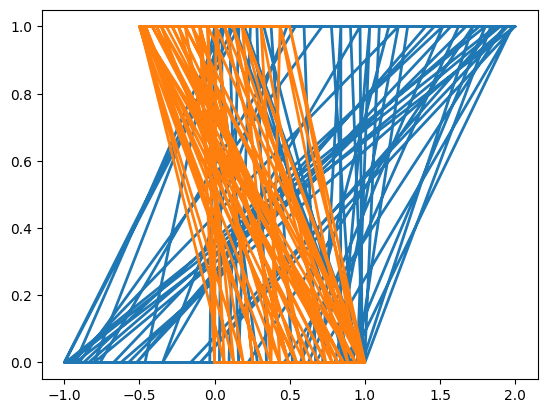

In [47]:
plt.plot(X, Y, linewidth=2.0)

## Сложный набор готовых данных

### В соответствии с вариантом использовался dataset: fetch_20newsgroups_vectorized

Получение данных

In [48]:
# Набор данных из 20 групп новостей.
# Этот модуль содержит два загрузчика.
# Первый, fetch_20newsgroups возвращает список необработанных текстов, которые могут быть переданы
# экстракторам текстовых признаков.
# Второй, fetch_20newsgroups_vectorized возвращает готовые к использованию функции,
# т. е. нет необходимости использовать средство извлечения признаков.

faces = datasets.fetch_20newsgroups_vectorized()
print(type(faces))

KeyboardInterrupt: encoding with 'zlib_codec' codec failed (KeyboardInterrupt: )

In [10]:
print(faces.data.shape)
faces_data = faces.data # матрица признаков (фото)
faces_target = faces.target # вектор целевых переменных
print(faces_data[0])
print(faces_target[0])

(400, 4096)
[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
0


Визуализация (несколько случайных экземпляров)

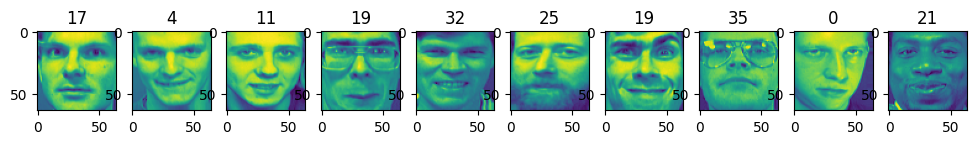

In [11]:
N = 10
f, ax = plt.subplots(1,N,figsize=(12,4))
np.random.seed(0)
for i in range(N):
  rand_i = np.random.randint(400)
  ax[i].imshow(faces_data[rand_i].reshape((64,64)))
  ax[i].set_title(f'{faces_target[rand_i]}')